# Data Science Nigeria: Introductory Machine Learning Training

In [ ]:
from IPython.display import Image
PATH = "C:/Users/training.NG-1NW8PX1/DSN/Week4"
Image(filename = PATH + "/DSN.jpg", width=600, height=300)

# WEEK 4: INTRODUCTION TO CLASSIFICATION

Binary/ Multi-class classification 

Classification Algorithms 

Evaluation of Classification Models Performance 

Error/ Cost function 

Confusion matrix 

Precision  

AUC 


In Classification, we predict the category a data belongs to ie. Classification algorithms are used to predict labels
* Spam Detection
* Churn Prediction
* Sentiment Analysis
* Dog Breed Detection

### TYPES OF CLASSIFICATION TASK

* Binary classification eg. e-mail spam detection (1 ->spam; or 0→not spam), biometric identification, whether a customer will default or Not
* Multi-class classification eg. digit recognition (where classes go from 0 to 9), predicting a party that wins the election,  

 <img src= './class.png', alt = "Data Science Nigeria" width= 600, height = 300/>

Classification Algorithms
1.	Logistic Regression         
2.  Naive Bayes Classifier
3.	Nearest Neighbor			
4. 	Support Vector Machines
5.	Decision Trees				
6. 	Boosted Trees
7.  Random Forest	            


## Import Modules 

In [1]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data= pd.read_csv("Social_Network_Ads.csv", delimiter= ",")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:

data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

## Pre-processing Data

In [4]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

## Exploratory analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int32
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int32(1), int64(4)
memory usage: 14.1 KB


In [7]:
# employees that did not buy and those that bought

left= data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [8]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


## Data Visualization

Users that purchased these Ads

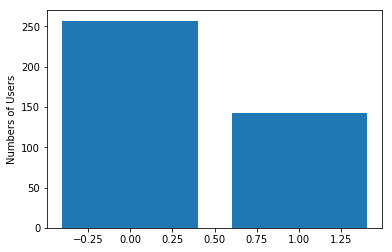

In [9]:
#how many users were in each category ?
left_count = left.count()
plt.bar(left_count.index.values, left_count['User ID'])
plt.ylabel("Numbers of Users")
plt.show()

In [10]:
# ratio of users that did bought the Ads were only 36%, 0- people that clicked the ad, 1- people taht didnt click the ad

data.Purchased.value_counts()
float(data.Purchased.value_counts()[1])/len(data) * 100



35.75

In [11]:
# ratio of those that didn't buy the ad
data.Purchased.value_counts()
float(data.Purchased.value_counts()[0])/len(data) * 100

64.25

### A little bit of feature engineering !

1) Using an Age category

IGen[1-24], Millenials[24-39], GenX[40-54], BabyBoomers[55-73] 

In [12]:
# inserting a new column

data['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else None \
 for age in list(data['Age'].values)]

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


2) Using an Income category [Inter-quartile Ranges]  # [Inter-quartile Ranges] takes a column and splits it into a number of quartiles nmeeded

In [14]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,iGen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,iGen,Medium


In [16]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


Lets see the Visuals

In [17]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

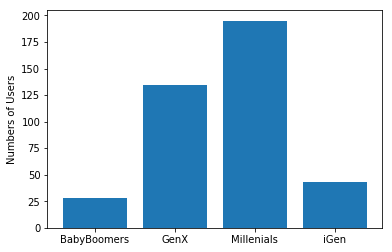

In [18]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

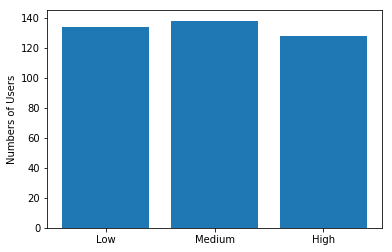

In [19]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

In [20]:
# data[data['Income Category'] == 'High'].max()

In [21]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


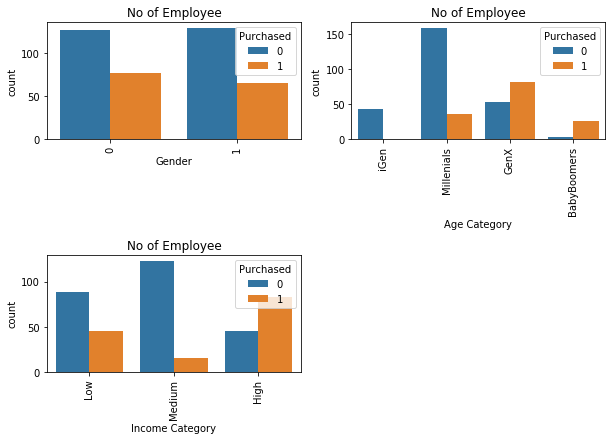

In [22]:
#whats the statistics based on those who did not make purchase

features= ['Gender', 'Age Category', 'Income Category']
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data , hue= "Purchased")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

## Model building

In [23]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [24]:
# split data into features and target

x = data[['Gender', 'Age','EstimatedSalary']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

#### Assignment: Use engineered features i.e new columns in training your model. Confirm if it improves our models significantly or not ?

### Algorithm/ Model 1 : Naive Bayes

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [27]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


In [28]:
# calculate ROC Curve AUC= AREA UNDER THE CURVE, ROC=
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.9080443019527833


In [29]:
# Plot confusion Matrix groundtruth=realtruth
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

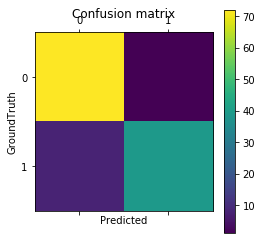

[[72  1]
 [ 8 39]]


In [30]:
conftable(y_test,y_pred,"conf")

In [31]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

### Algorithm/ Model 2 : Logistic Regression

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.6083333333333333


C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision:  0.0
Recall:  0.0
ROC AUC 0.5


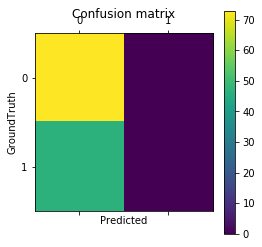

[[73  0]
 [47  0]]


In [34]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Algorithm/ Model 3 : Random Forest

In [35]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.9
Precision:  0.8888888888888888
Recall:  0.851063829787234
ROC AUC 0.8912853395511511


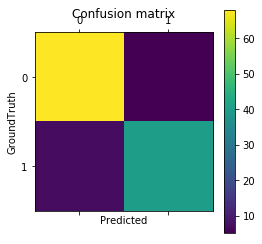

[[68  5]
 [ 7 40]]


In [37]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Extra Algorithm/ Model 4 : XGBoost

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

Accuracy:  0.9333333333333333
Precision:  0.9148936170212766
Recall:  0.9148936170212766
ROC AUC 0.9300495482366656


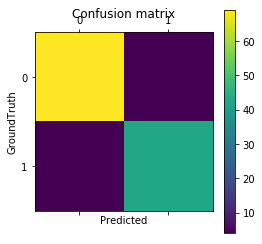

[[69  4]
 [ 4 43]]


In [39]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

# Assignment

In [40]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [87]:
x = data[['Age Category', 'Income Category','EstimatedSalary']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [88]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Age Category']=le.fit_transform(data['Age Category'])

In [89]:
data['Age Category'].value_counts()

2    195
1    134
3     43
0     28
Name: Age Category, dtype: int64

In [90]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Income Category']=le.fit_transform(data['Income Category'])

In [91]:
data['Income Category'].value_counts()

2    138
1    134
0    128
Name: Income Category, dtype: int64

In [92]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [94]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7833333333333333
Precision:  0.8888888888888888
Recall:  0.5106382978723404


In [95]:
# calculate ROC Curve AUC= AREA UNDER THE CURVE, ROC=
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.7347712037306907


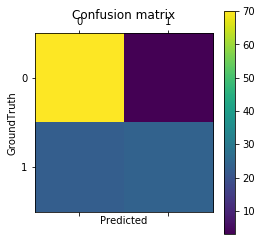

[[70  3]
 [23 24]]


In [96]:
conftable(y_test,y_pred,"conf")

C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.825
Precision:  0.90625
Recall:  0.6170212765957447
ROC AUC 0.787962693092393


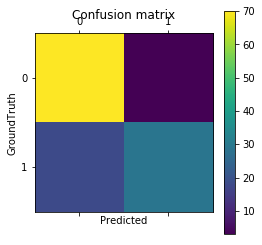

[[70  3]
 [18 29]]


In [97]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

Accuracy:  0.875
Precision:  0.8333333333333334
Recall:  0.851063829787234
ROC AUC 0.8707373943456718


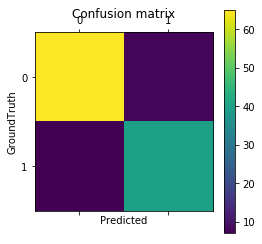

[[65  8]
 [ 7 40]]


In [98]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

Accuracy:  0.9083333333333333
Precision:  0.875
Recall:  0.8936170212765957
ROC AUC 0.905712620227339


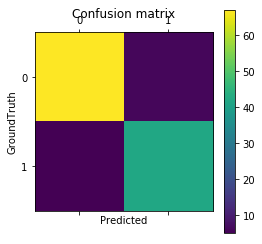

[[67  6]
 [ 5 42]]


In [99]:
# Fitting XGBoost Classification to the Training set
xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [66]:
data['Age Category'].dtypes

dtype('int64')

# using gender, income category and estimated salary


In [78]:
x = data[['Gender', 'Income Category','EstimatedSalary']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [79]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.7583333333333333
Precision:  0.875
Recall:  0.44680851063829785
ROC AUC 0.7028563101136694


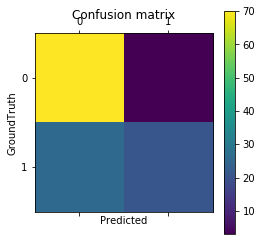

[[70  3]
 [26 21]]


In [81]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
# calculate ROC Curve AUC= AREA UNDER THE CURVE, ROC=
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.75
Precision:  0.7428571428571429
Recall:  0.5531914893617021
ROC AUC 0.7149519090644127


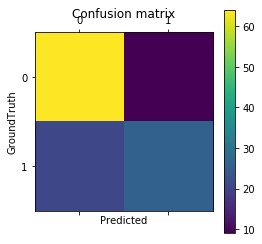

[[64  9]
 [21 26]]


In [82]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

Accuracy:  0.7416666666666667
Precision:  0.6904761904761905
Recall:  0.6170212765957447
ROC AUC 0.7194695424074613


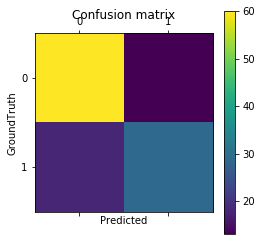

[[60 13]
 [18 29]]


In [83]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

Accuracy:  0.7416666666666667
Precision:  0.7857142857142857
Recall:  0.46808510638297873
ROC AUC 0.6929466627805305


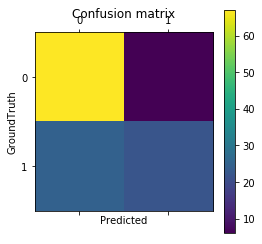

[[67  6]
 [25 22]]


In [84]:
# Fitting XGBoost Classification to the Training set
xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

From the analysis of the other variables, it can be concluded that the first classification is the best and XGBoost is the right classifier to use.